In [14]:
#최소자승법(OLS)
from sklearn.datasets import make_regression

bias = 100
X, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=1,
    coef=True, random_state=1
)

print(X[:5])
print(y[:5])
print(w)

[[ 0.23249456]
 [-0.03869551]
 [ 0.5505375 ]
 [ 0.50318481]
 [ 2.18697965]]
[120.8767105   96.29265896 149.01930151 143.31856789 288.47991463]
86.44794300545998


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y) #회귀분석 모형
print(model.intercept_, model.coef_)

99.97915086898693 [86.49931991]


In [16]:
#회귀분석 모형에 새로운 값을 입력하여 예측, 2차원 배열료 입력
model.predict([[-2], [-1], [0], [1], [2]])

array([-73.01948894,  13.47983096,  99.97915087, 186.47847078,
       272.97779068])

In [17]:
print(X.flatten()[:5]) #2차원을 1차원으로
print(y[:5])

[ 0.23249456 -0.03869551  0.5505375   0.50318481  2.18697965]
[120.8767105   96.29265896 149.01930151 143.31856789 288.47991463]


In [18]:
#데이터프레임으로 변환
import pandas as pd
df = pd.DataFrame({'x':X.flatten(), 'y':y})
df

,x,y
0,0.232495,120.876711
1,-0.038696,96.292659
2,0.550537,149.019302
3,0.503185,143.318568
4,2.186980,288.479915
...,...,...
195,-0.172428,85.371970
196,-1.199268,-4.669495
197,1.462108,225.367263
198,1.131629,199.318644


In [19]:
import statsmodels.api as sm

X = df[['x']]
y = df[['y']]

model = sm.OLS(y,X) #최소자승법 함수
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.456
Model:                            OLS   Adj. R-squared (uncentered):              0.453
Method:                 Least Squares   F-statistic:                              166.7
Date:                Fri, 03 Dec 2021   Prob (F-statistic):                    4.17e-28
Time:                        11:57:50   Log-Likelihood:                         -1203.4
No. Observations:                 200   AIC:                                      2409.
Df Residuals:                     199   BIC:                                      2412.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x             99.2043      7.683     12.913      0.000      84.054     114.354
==============================================================================
Omnibus:                        0.733   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.693   Jarque-Bera (JB):                0.457
Skew:                           0.088   Prob(JB):                        0.796
Kurtosis:                       3.154   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
result.predict([-2,-1,0,1,2]) #1차원 배열로 입력

array([-198.40856505,  -99.20428253,    0.        ,   99.20428253,
        198.40856505])

In [21]:
result.params #기울기

x    99.204283
dtype: float64

In [22]:
result.resid #잔차(실제값과 예측값의 차이)

0       97.812255
1      100.131419
2       94.403624
3       93.400479
4       71.522168
          ...    
195    102.477587
196    114.303029
197     80.319894
198     87.056163
199     94.403675
Length: 200, dtype: float64

Text(0, 0.5, 'Residual')

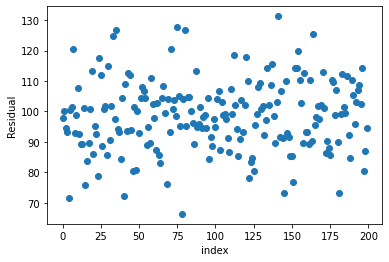

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

result.resid.plot(style='o')
plt.xlabel('index')
plt.ylabel('Residual')